In [1]:
import pandas as pd

# import data for users already containing expectations
users = pd.read_csv('processed_data/user_expectations.csv')

# show data
users

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,correlation,expectation
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,157,251,1847,7054,3131,3131,1521,1946,0.112531,0.443735
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,395,130,915,3396,1915,1915,696,470,0.147306,0.426347
2,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,47,21,518,773,867,867,310,231,0.230683,0.384659
3,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,2,0,16,23,43,43,20,25,0.085328,0.457336
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,83,23,229,570,528,528,118,50,0.207845,0.396078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,JX7mjMODvt96vQIj9ENzhw,R,221,2012-02-06 02:05:17,536,195,226,"2016,2017,2018,2019,20,20,2021","QiciohgD8N6vCty4vGL3pQ, _aDK_NGbMmfGGE6sgDBqnA...",22,...,0,0,35,49,27,27,7,16,-0.018222,0.509111
9996,mbvw-TCrr1GB0KKnhRm8Bw,Laura,141,2013-11-20 17:10:01,410,19,210,"2019,20,20,2021","4IsGHKofyfefMEM6X-zP3A, US7juhqY2QYZ_SLW_53gqA...",11,...,0,0,7,11,17,17,4,6,0.129754,0.435123
9997,KuApdo6_qx3K_wMqVDK3eA,Michelle,149,2018-08-21 14:32:38,129,12,52,"2019,20,20,2021","G0Ex17NeMJUwqNIl8Z4ecw, IB2Zyn6ak7wt4YN-jBwP4w...",5,...,0,0,7,7,6,6,12,9,0.148417,0.425791
9998,PVvxH6RF34ky9gvBrL6Zgg,Richard,85,2014-10-17 00:17:59,42,7,10,NaN,qT1-N9hjbyjMW4Mvq4uU4w,2,...,0,0,2,0,0,0,1,0,0.439042,0.280479


               expectation  average_stars
expectation       1.000000      -0.102196
average_stars    -0.102196       1.000000


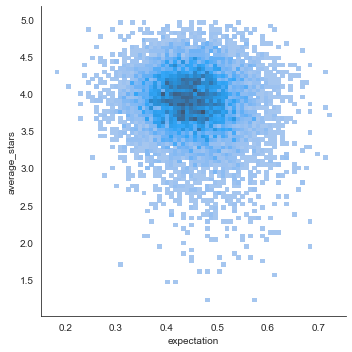

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# check correlation
print(users[['expectation', 'average_stars']].corr())

sns.set_style('white')

# plot expectations vs mean rating
sns.displot(data=users, x='expectation', y='average_stars')

plt.savefig('figures/expectation_vs_mean_stars.png', dpi=200)
plt.show()

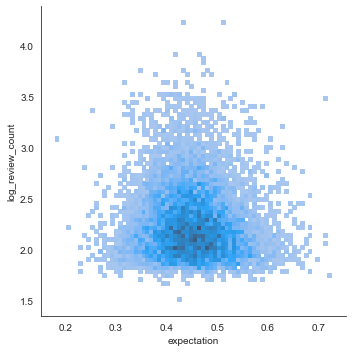

In [8]:
import numpy as np

# create a log column
users['log_review_count'] = np.log10(users['review_count'])

sns.displot(data=users, x='expectation', y='log_review_count')
plt.savefig('figures/expectation_vs_review_count.png', dpi=200)
plt.show()

In [11]:
mean_price_score = []

# get mean price score for each user
reviews = pd.read_csv('processed_data/reviews_price_score.csv')
user_mean = reviews.groupby('user_id').mean().reset_index()
users = users.merge(user_mean[['user_id', 'price_score']], on='user_id')

# check new dataframe
users

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos,correlation,expectation,log_review_count,price_score
0,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,1847,7054,3131,3131,1521,1946,0.112531,0.443735,3.636789,2.602047
1,MGPQVLsODMm9ZtYQW-g_OA,Jelena,1807,2008-01-19 22:50:00,17331,10461,13734,"2008,2009,2010,2011,2012,2013,2014,2015,2016,2...","HpJzEFN1kyuH6VAF_usqKg, F_NG8ZaNVriV_hujoOejIA...",828,...,915,3396,1915,1915,696,470,0.147306,0.426347,3.256958,2.335247
2,NIhcRW6DWvk1JQhDhXwgOQ,Lia,2288,2005-12-30 13:47:19,12773,4199,7971,"2006,2007,2008,2009,2010,2011,2012,2013,2014,2...","T1upaPMzuW7pNj74fO1rjA, CP28puvAEimt4ziuGTDaHA...",345,...,518,773,867,867,310,231,0.230683,0.384659,3.359456,2.354012
3,rppTTi-kfF8-qyiArNemag,Helen,460,2006-01-24 14:33:32,700,149,425,"2010,2012,2013,2014,2015,2016,2017,2018","HzoQKKHDq9BI37dyJAAtGA, Inh7WS8hpmiUmNDhtLK-ZQ...",49,...,16,23,43,43,20,25,0.085328,0.457336,2.662758,2.147427
4,AkBtT43dYcttxQ3qOzPBAg,Sherri,1034,2007-02-20 18:21:07,3066,1485,2235,"2007,2008,2009,2010,2011,2012,2013,2014,2015,2016","Hg1EF9PjGfcKBSNMjvWBeQ, PcPminF0bIUsKjUh9e4DMQ...",114,...,229,570,528,528,118,50,0.207845,0.396078,3.014521,2.492390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,JX7mjMODvt96vQIj9ENzhw,R,221,2012-02-06 02:05:17,536,195,226,"2016,2017,2018,2019,20,20,2021","QiciohgD8N6vCty4vGL3pQ, _aDK_NGbMmfGGE6sgDBqnA...",22,...,35,49,27,27,7,16,-0.018222,0.509111,2.344392,2.504398
9996,mbvw-TCrr1GB0KKnhRm8Bw,Laura,141,2013-11-20 17:10:01,410,19,210,"2019,20,20,2021","4IsGHKofyfefMEM6X-zP3A, US7juhqY2QYZ_SLW_53gqA...",11,...,7,11,17,17,4,6,0.129754,0.435123,2.149219,2.262364
9997,KuApdo6_qx3K_wMqVDK3eA,Michelle,149,2018-08-21 14:32:38,129,12,52,"2019,20,20,2021","G0Ex17NeMJUwqNIl8Z4ecw, IB2Zyn6ak7wt4YN-jBwP4w...",5,...,7,7,6,6,12,9,0.148417,0.425791,2.173186,2.001760
9998,PVvxH6RF34ky9gvBrL6Zgg,Richard,85,2014-10-17 00:17:59,42,7,10,NaN,qT1-N9hjbyjMW4Mvq4uU4w,2,...,2,0,0,0,1,0,0.439042,0.280479,1.929419,2.128483


             expectation  price_score
expectation     1.000000    -0.037343
price_score    -0.037343     1.000000


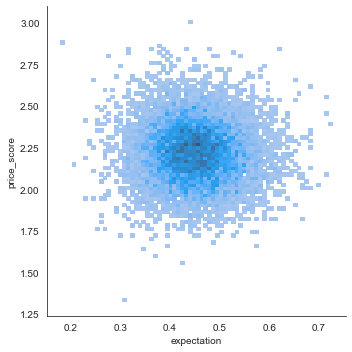

In [12]:
# check correlation
print(users[['expectation', 'price_score']].corr())

# plot the expectation with mean price score
sns.displot(data=users, x='expectation', y='price_score')
plt.savefig('figures/expectation_vs_price_score.png', dpi=200)
plt.show()